**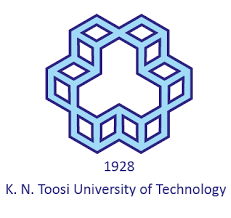**
# ***Geometric Geodesy Assignment 1***

KNTU G.E engineering faculty _ 2023 March

*By : Hasti Rafiei Nia & Sama Haji Seyedian*

*Student Code : 9926683 & 9925413*



Importing Libraries.

In [42]:
import numpy as np 
import math as mt

# ***Question 1***

***Part 1***

Calculation of Cartesian coordinates by curve coordinates.

In [43]:
a = 6378137
f = 1 / 298.2572
phi = 35.699737 * (mt.pi/180)
landa = 51.338325 * (mt.pi/180)
h = 1187.1960000047
print("phi = " , phi , "Landa = " , landa)

phi =  0.6230779527460429 Landa =  0.8960228037089178


Calculations.

In [44]:
b = a - (a * f)
e2 = (a**2 - b**2)/(a**2)
e2_prim = (a**2 - b**2)/(b**2)
N = a / np.sqrt( mt.cos(phi)**2 + (b**2 / a**2) * mt.sin(phi)**2)

print("b = " , b ,",", "e^2 = " , e2 ,",", "e^2'= " , e2_prim ,",", "N = " , N)

b =  6356752.312555741 , e^2 =  0.006694380518124454 , e^2'=  0.006739497277400234 , N =  6385419.0730443485


Cartezian coordinates are : 

In [45]:
x = (N+h)  * mt.cos(phi)  * mt.cos(landa)
y = (N+h)  * mt.cos(phi)  * mt.sin(landa)
z = (N * (b**2)/(a**2) +h)* mt.sin(phi)

print("X = " , x ,",", "Y = " , y ,",", "Z = " , z)

X =  3240097.102925025 , Y =  4049850.8789553107 , Z =  3701880.0103854463


***Part 2***

Calculation of curve coordinates by Cartesian coordinates.

Calculate the new longitude of the curve.

In [46]:
landa1 = mt.atan(y / x)
print("Landa = " , landa1)

Landa =  0.8960228037089178


Calculations and initial values to repeat.

In [47]:
P = np.sqrt( x**2 + y**2)
N0 = a
h0 = np.sqrt( x**2 + y**2 + z**2) - np.sqrt(a*b)
phi0 = mt.atan((z / P) * (1 - ((e2*N0)/(N0+h0)))**(-1))

Calculation of the new geodetic width of the curve by repetition.

In [48]:
N1 = []
h1 = []
phi1 = []
delta = 1
N1 = 1
h1 = 1
phi1 = 1
while np.linalg.norm(delta) > 10**(-6):
    N1 = a / np.sqrt(mt.cos(phi0)**2 + (b**2/a**2) * mt.sin(phi0)**2)
    h1 = (P / mt.cos(phi0)) - N1
    phi1 = mt.atan((z / P) * (1-(e2 * N1) / (N1 +h1))**(-1))
    delta = [N1-N0 , phi1-phi0 , h1-h0]
    N0 = N1
    h0 = h1
    phi0 = phi1
    
print("phi1= " , phi1 , " h1= " , h1 , " N1= " , N1)

phi1=  0.6230779527460429  h1=  1187.1960000051185  N1=  6385419.0730443485


***Part 3 : Comparison of the previous two parts.***

As you can see, the longitudes were equal in both cases because we didn't need initial values.

But for the latitude, because we proceeded with the repetition method and used initial values, as a result, the answer of the second part is slightly different from the first part.

# ***Question 2***

In [49]:
a1 = 6378206.4 ; a2 = 6378338
f1 = 1/294.98 ; f2 = 1/297
x1 = -25.8 ; x2 =  -64.6
y1  = -168.1 ; y2 =  -154.8
z1 = 167.8 ; z2 = -46.2
phi = 0.779865469
landa = 1.110238844
h =  37.46

Calculating delta φ, delta λ and delta h and the new amount of φ, λ and h.

In [52]:
Delta = np.array([x2 - x1, y2 - y1, z2 - z1]).T
AFDelta = np.array([a2 - a1, f2 - f1]).T

M = (a1 * (1 - f1) ** 2)/((((np.cos(phi)) ** 2) + ((1 - f1) ** 2) * (np.sin(phi)) ** 2) ** (1.5))
N = (a1 ** 2)/np.sqrt(((a1 ** 2) * np.cos(phi) ** 2) + (((a1*(1 - f1)) ** 2) * np.sin(phi) ** 2))

J = np.array([[-(M + h) * np.sin(phi) * np.cos(landa), -(N + h) * np.cos(phi) * np.sin(landa), np.cos(phi) * np.cos(landa)],
              [-(M + h) * np.sin(phi) * np.sin(landa), (N + h) * np.cos(phi) * np.cos(landa), np.cos(phi) * np.sin(landa)],
              [ (M + h) * np.cos(phi), 0, np.sin(phi)]])
B = np.array([[(N * np.cos(phi) * np.cos(landa))/a1, (M * ((np.sin(phi)) ** 2) * np.cos(phi) * np.cos(landa))/(1-f1)],
              [(N * np.cos(phi) * np.sin(landa))/a1, (M * ((np.sin(phi)) ** 2) * np.cos(phi) * np.sin(landa))/(1-f1)],
              [(N * (1 - f1) ** 2 * np.sin(phi))/a1, (((M * (np.sin(phi)) ** 2) - 2 * N) * np.sin(phi))/(1-f1)]])
CoordinateDelta = np.dot(np.linalg.inv(J), (-((np.dot(B, AFDelta)) + Delta)))
final = np.array([phi, landa, h]).T + CoordinateDelta


print("phi is =", final[0])
print("landa is =",final[1])
print("h is = ", final[2])

phi is = 0.7798656343380601
landa is = 1.1102298913168174
h is =  -12.986467888572442
